In [1]:
import pathlib

import pandas as pd
import seaborn as sns

Change directory to project root.

In [2]:
cd ~/Documents/repos/coding/vocalpy/songdkl/

/home/pimienta/Documents/repos/coding/vocalpy/songdkl


Load .csv of father-son relationships to use to organize results of running script that tests Song_DKL, and add column names.

In [3]:
fath_offspring_csv = './tests/data-for-tests/source/fath_offspring.csv'

fath_df = pd.read_csv(fath_offspring_csv, header=None)
fath_df.columns = ['father', 'son']

Load results of running `src/scripts/test_songdkl_calculate.py` as a pandas DataFrame.  
Each row in the .csv is the result of running `songdkl.calculate` on two pairs from the dataset, that will either be a father and son--where the "reference" song is the father's--or two unreleated birds.

In [4]:
results_csv = './results/test-songdkl-calculate.csv'
results_df = pd.read_csv(results_csv)

Now use the father-son .csv to add a column indicating for each row whether the two birds are related, i.e. whether the reference song is the father's song and the comparison song is one of that father's sons.

In [5]:
def related(row):    
    return ((fath_df.father == row['ref']) & (fath_df.son == row['compare'])).any()

results_df['related'] = results_df.apply(related, axis=1)    

Finally make a grouped box plot where the top-level group, the x-axis variable, is fathers, and the factors within that group are whether or not the comparison song was from one of the father's son. We expect that $D_{KL}$ will be lower for related birds.

(0.0, 50.0)

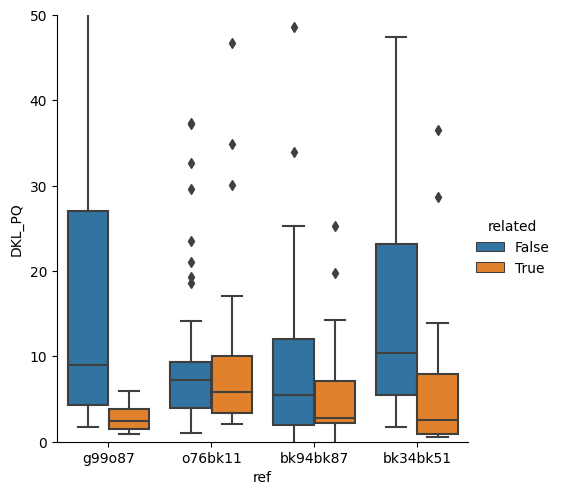

In [6]:
g = sns.catplot(
    data=results_df,
    x='ref',
    y='DKL_PQ',
    hue='related',
    kind='box',
)

g.fig.axes[0].set_ylim([0, 50])